In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("DNN Dataset_csv.csv")
df.head()

,Sex,Age,Duration on ART,CurrentViralLoad,LastWeight,BP,Educationallevel,MaritalStatus,EmploymentStatus,CurrentARTStatus,PATIENT HAS DIED
0,Female,40,1426,111.0,57.0,100/60,Secondary school education,Married,Employee,Active,False
1,Male,74,1909,0.0,87.0,132/74,Secondary school education,Never married,Unemployed,Active,False
2,Male,73,1914,73179.0,75.0,100/80,NaN,Widowed,Employee,Active,False
3,Male,19,1910,58467.0,60.0,0/0,Secondary school education,Married,Student,Active,False
4,Female,62,1907,27300.0,39.0,145/77,Secondary school education,Widowed,Employee,Active,False


In [ ]:
df.duplicated().sum()

255

In [ ]:
# Drop duplicates
df.drop_duplicates(inplace = True)

In [ ]:
# Fillna
df.fillna({"Whostage":0}, inplace = True)

who_stage_replace = {"WHO STAGE 1 PEDS": 1, "WHO STAGE 2 PEDS":2, "WHO STAGE 3 PEDS": 3, "WHO STAGE 4 PEDS": 4}

# Convert `whostage` to numerical data
df.Whostage = df.Whostage.replace(to_replace = who_stage_replace).astype(str).apply(pd.to_numeric, errors='coerce').astype(int)

AttributeError: 'DataFrame' object has no attribute 'Whostage'

In [ ]:
df.fillna({"BP": 0}, inplace = True)

# Split `BP` into systolis and diastolic
df[['BP_Systolic', 'BP_Diastolic']] = df.BP.str.split("/", expand=True).fillna(0).astype(int)

In [ ]:
df.head()

,Sex,Age,Duration on ART,CurrentViralLoad,LastWeight,BP,Educationallevel,MaritalStatus,EmploymentStatus,CurrentARTStatus,PATIENT HAS DIED,BP_Systolic,BP_Diastolic
0,Female,40,1426,111.0,57.0,100/60,Secondary school education,Married,Employee,Active,False,100,60
1,Male,74,1909,0.0,87.0,132/74,Secondary school education,Never married,Unemployed,Active,False,132,74
2,Male,73,1914,73179.0,75.0,100/80,NaN,Widowed,Employee,Active,False,100,80
3,Male,19,1910,58467.0,60.0,0/0,Secondary school education,Married,Student,Active,False,0,0
4,Female,62,1907,27300.0,39.0,145/77,Secondary school education,Widowed,Employee,Active,False,145,77


In [ ]:
df.to_csv("dnn_data_1", index = False)

In [ ]:
df.isnull().sum()

Sex                     0
Age                     0
Duration on ART         0
CurrentViralLoad     8202
LastWeight           1450
BP                      0
Educationallevel    10892
MaritalStatus        3999
EmploymentStatus     5553
CurrentARTStatus        0
PATIENT HAS DIED        0
BP_Systolic             0
BP_Diastolic            0
dtype: int64

<Axes: ylabel='Current_TB_Status'>

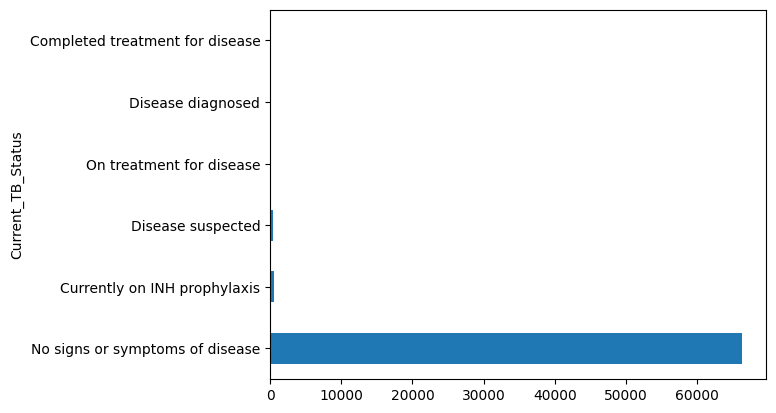

In [ ]:
df.Current_TB_Status.value_counts().plot(kind = "barh")

In [ ]:
# Convert date columns to appropriate format
df["ARTStartDate"] = pd.to_datetime(df.ARTStartDate, format='mixed')
df["Pharmacy_LastPickupdate"] = pd.to_datetime(df["Pharmacy_LastPickupdate"], format='mixed')

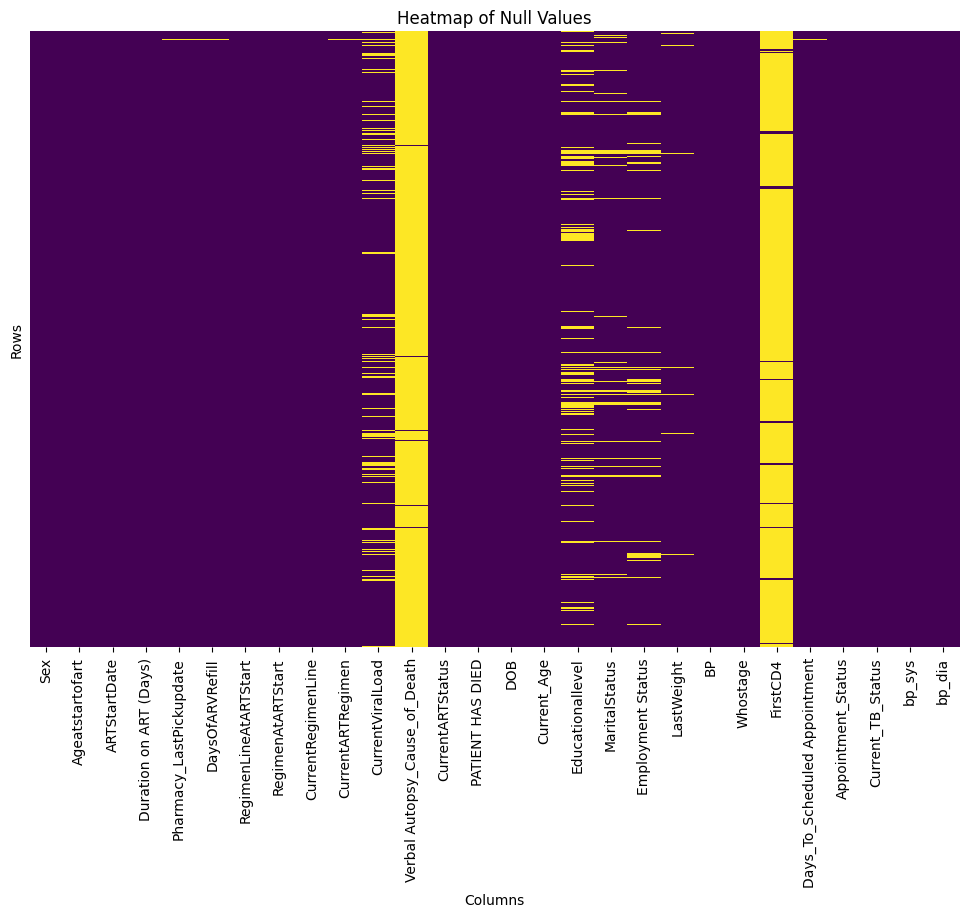

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_filtered is your DataFrame

# Create a dataframe with the same shape as df_filtered, with True where values are NaN and False elsewhere
null_df = df.isnull()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(null_df, cmap='viridis', cbar=False, yticklabels=False)

# Add title and labels
plt.title('Heatmap of Null Values')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Display the heatmap
plt.show()


In [ ]:
# Check percentage of null values
(df.isnull().sum()/len(df)) * 100

Sex                               0.000000
Ageatstartofart                   0.000000
ARTStartDate                      0.000000
Duration on ART (Days)            0.000000
Pharmacy_LastPickupdate           0.255856
DaysOfARVRefill                   0.263208
RegimenLineAtARTStart             0.024997
RegimenAtARTStart                 0.067640
CurrentRegimenLine                0.024997
CurrentARTRegimen                 0.324967
CurrentViralLoad                 12.064934
Verbal Autopsy_Cause_of_Death    99.044216
CurrentARTStatus                  0.000000
PATIENT HAS DIED                  0.000000
DOB                               0.000000
Current_Age                       0.000000
Educationallevel                 16.063052
MaritalStatus                     5.884688
Employment Status                 8.172688
LastWeight                        2.136545
BP                                0.000000
Whostage                          0.000000
FirstCD4                         95.876895
Days_To_Sch

Text(0.5, 0, 'Number of Days on ART Medication')

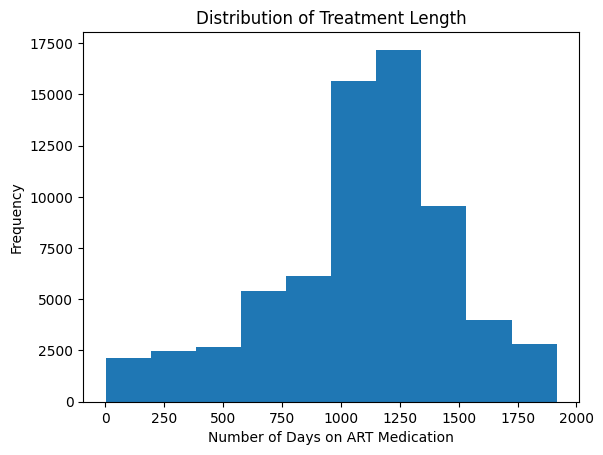

In [ ]:
df["Duration on ART (Days)"].plot(kind = "hist", title = "Distribution of Treatment Length")

plt.xlabel("Number of Days on ART Medication")

In [ ]:
# Drop columns will too many missing values
df.drop(axis = 1, columns= ["Verbal Autopsy_Cause_of_Death", "FirstCD4"], inplace = True)

# Drop redundant column
df.drop(axis = 1, columns = ["DOB", "BP"], inplace = True)

# Drop leaky features
df.drop(axis = 1, columns= ["CurrentARTStatus"], inplace = True) # This tells us if a person is dead or not

# Drop irrelevant column
df = df[~(df["MaritalStatus"] == "Adult inpatient service")]


In [ ]:
# Combine the two columns into a single column of unique combinations
df['RegimenLineCombination'] = df.RegimenLineAtARTStart + "_" + df.CurrentRegimenLine

# Encode the unique combinations into integer categories
label_encoder = LabelEncoder()
df['RegimenLineCombinationEncoded'] = label_encoder.fit_transform(df['RegimenLineCombination'])

# Drop the original text columns
df.drop(columns=['RegimenLineAtARTStart', 'CurrentRegimenLine', 'RegimenLineCombination'], inplace=True)


In [ ]:
# Combine the two columns into a single column of unique combinations
df['RegimenARTCombination'] = df['RegimenAtARTStart'] + '_' + df['CurrentARTRegimen']

# Encode the unique combinations into integer categories
label_encoder = LabelEncoder()
df['RegimenARTCombinationEncoded'] = label_encoder.fit_transform(df['RegimenARTCombination'])

# Drop the original text columns
df.drop(columns=['RegimenAtARTStart', 'CurrentARTRegimen', 'RegimenARTCombination'], inplace=True)


# EDA

PATIENT HAS DIED
False    Axes(0.125,0.11;0.775x0.77)
True     Axes(0.125,0.11;0.775x0.77)
Name: Current_Age, dtype: object

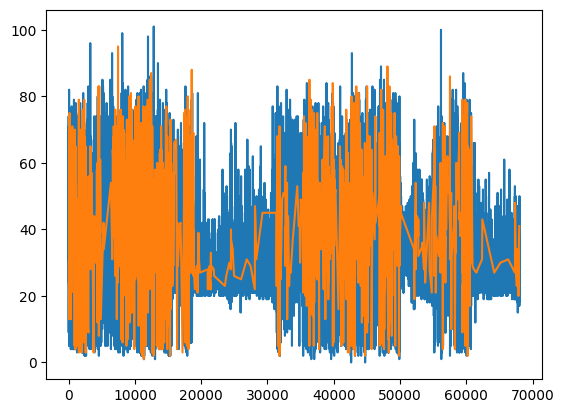

In [ ]:
df.groupby("PATIENT HAS DIED")["Current_Age"].plot()

In [ ]:
df["PATIENT HAS DIED"].value_counts()

PATIENT HAS DIED
False    65829
True      2166
Name: count, dtype: int64

Text(0.93, 2000, '1221')

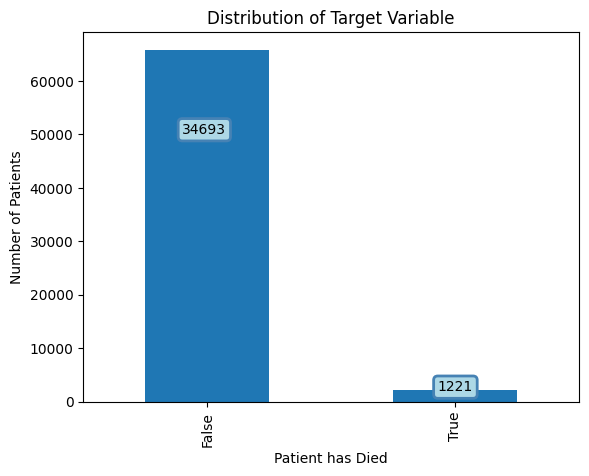

In [ ]:
# Check for class imbalance
df["PATIENT HAS DIED"].value_counts().plot(kind = "bar", title = "Distribution of Target Variable")

plt.ylabel("Number of Patients")
plt.xlabel("Patient has Died")

# Annotate chart
plt.annotate("34693", (-0.1, 50137), bbox=dict(boxstyle="round,pad=0.3",
                      fc="lightblue", ec="steelblue", lw=2))
plt.annotate("1221", (0.93, 2000), bbox=dict(boxstyle="round,pad=0.3",
                      fc="lightblue", ec="steelblue", lw=2))

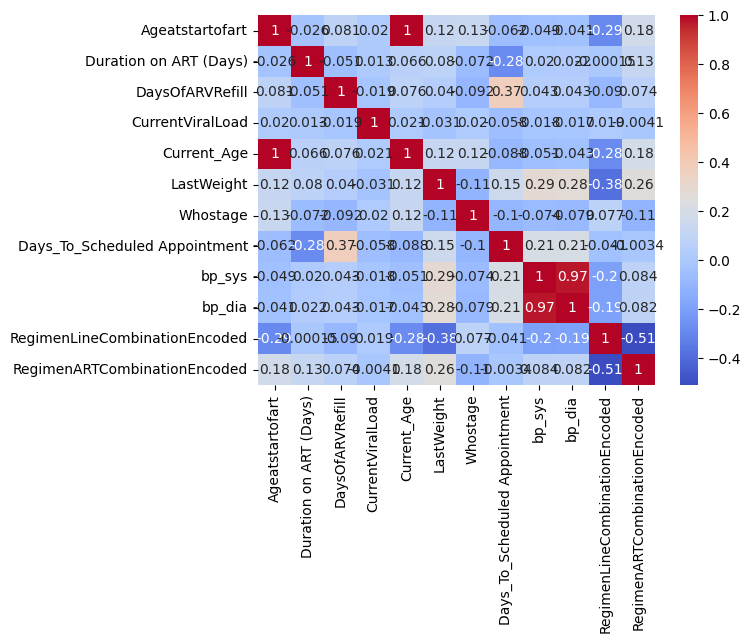

In [ ]:
correlation = df.select_dtypes("number").corr()
correlation
# Plot heatmap of `correlation`
sns.heatmap(correlation, annot=True, cmap='coolwarm');

In [ ]:
df.describe()

,Ageatstartofart,ARTStartDate,Duration on ART (Days),Pharmacy_LastPickupdate,DaysOfARVRefill,CurrentViralLoad,Current_Age,LastWeight,Whostage,Days_To_Scheduled Appointment,bp_sys,bp_dia,RegimenLineCombinationEncoded,RegimenARTCombinationEncoded
count,67995.000000,67995,67995.000000,67821,67816.000000,5.980100e+04,67995.000000,66542.000000,67995.000000,67814.000000,67995.000000,67995.000000,67995.000000,67995.000000
mean,31.654078,2021-04-04 12:16:43.203176704,1094.279726,2023-07-08 11:00:57.805104384,143.008258,4.246741e+03,34.716126,63.864586,1.099993,-144.276639,88.027281,57.135981,0.328480,67.745364
min,0.000000,2019-01-01 00:00:00,2.000000,2010-10-02 00:00:00,1.000000,0.000000e+00,0.000000,0.000000,0.000000,-4375.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2020-07-21 00:00:00,930.000000,2023-05-10 00:00:00,90.000000,0.000000e+00,27.000000,57.000000,1.000000,-157.000000,90.000000,52.000000,0.000000,68.000000
50%,29.000000,2021-02-16 00:00:00,1145.000000,2023-09-08 00:00:00,180.000000,0.000000e+00,32.000000,65.000000,1.000000,-97.000000,110.000000,70.000000,0.000000,68.000000
75%,38.000000,2021-10-09 00:00:00,1334.000000,2024-01-29 00:00:00,180.000000,1.900000e+01,41.000000,71.000000,1.000000,50.000000,120.000000,80.000000,0.000000,68.000000
max,100.000000,2024-12-03 00:00:00,1916.000000,2024-12-03 00:00:00,180.000000,1.000000e+07,101.000000,197.000000,4.000000,178.000000,240.000000,150.000000,23.000000,102.000000
std,11.458577,NaN,385.511043,NaN,46.439239,9.603951e+04,11.458369,13.802845,0.395602,353.541841,50.403227,33.125446,2.219989,7.897989


Text(0.5, 1.0, 'Number of ARV Refill Days')

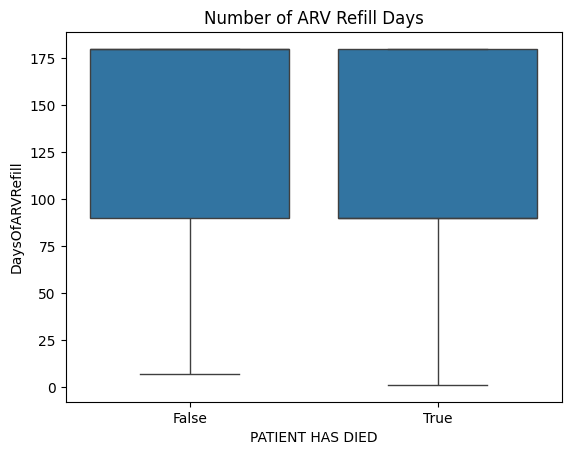

In [ ]:
sns.boxplot(data = df, x = "PATIENT HAS DIED", y = "DaysOfARVRefill")
plt.title("Number of ARV Refill Days")
# this does not tell if a refill cost or saved the person's life

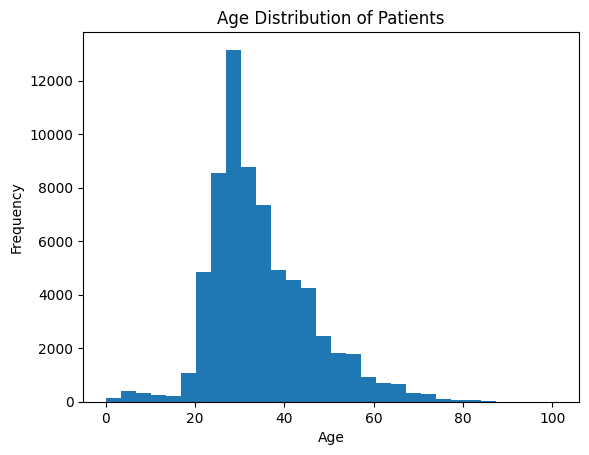

In [ ]:
df['Current_Age'].plot(kind='hist', bins=30)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

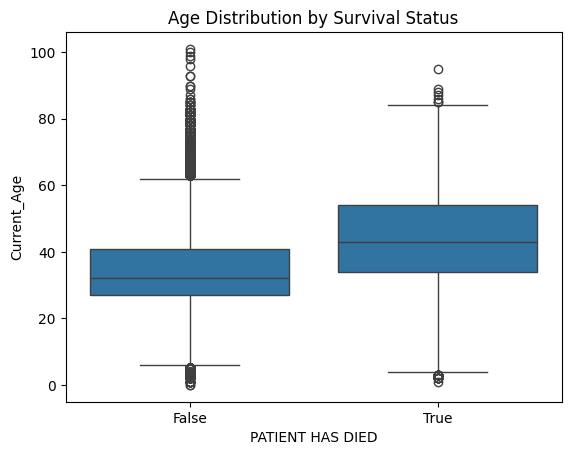

In [ ]:
sns.boxplot(x='PATIENT HAS DIED', y='Current_Age', data=df)
plt.title('Age Distribution by Survival Status')
plt.show()

<Axes: title={'center': 'Systolic Blood Pressure with Outliers'}>

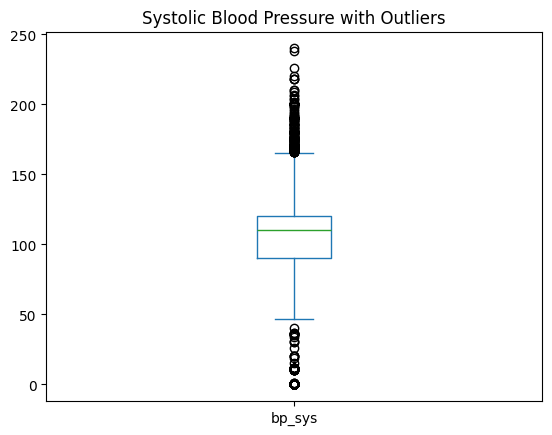

In [ ]:
df.bp_sys.plot(kind = "box", title = "Systolic Blood Pressure with Outliers")

<Axes: title={'center': 'Diastolic Blood Pressure with Outliers'}>

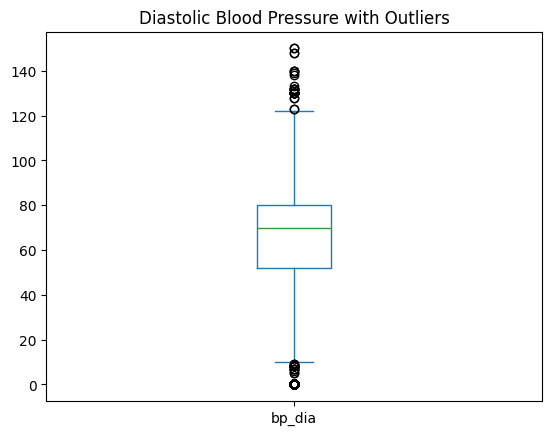

In [ ]:
df.bp_dia.plot(kind = "box", title = "Diastolic Blood Pressure with Outliers")

<Axes: xlabel='PATIENT HAS DIED', ylabel='bp_dia'>

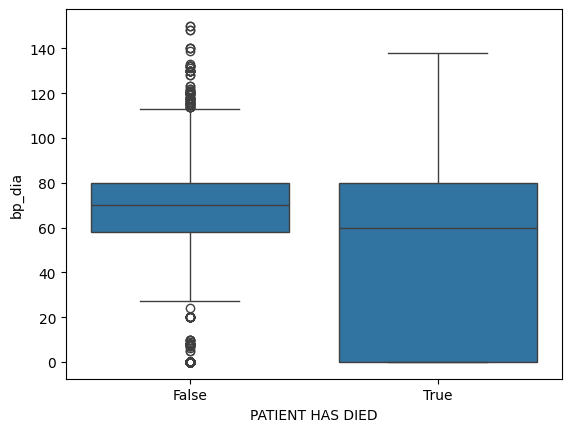

In [ ]:
sns.boxplot(data = df, x = "PATIENT HAS DIED", y = "bp_dia")

<Axes: xlabel='PATIENT HAS DIED', ylabel='bp_sys'>

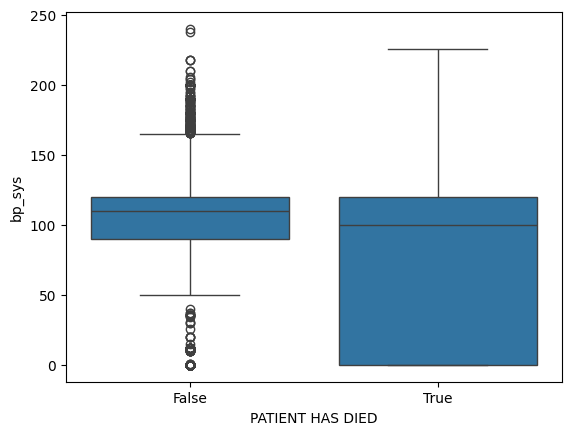

In [ ]:
sns.boxplot(data = df, x = "PATIENT HAS DIED", y = "bp_sys")


### Clip BP

In [ ]:
# Filtering out abnormal BPs
abnormally_high_bp = (df["bp_sys"] > 220) | (df["bp_dia"] > 150)
abnormally_low_bp = (df["bp_sys"] < 60) | (df["bp_dia"] < 40)

df = df[~abnormally_high_bp]
df = df[~abnormally_low_bp]

C:\Users\Eby\AppData\Local\Temp\ipykernel_1200\2499144699.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~abnormally_low_bp]


<Axes: title={'center': 'Clipped Systolic Blood Pressure'}>

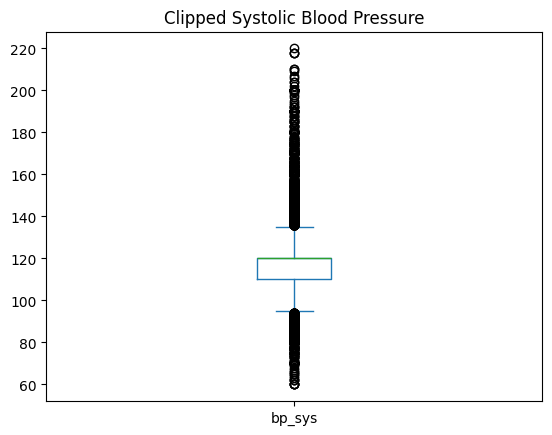

In [ ]:
df.bp_sys.plot(kind = "box", title = "Clipped Systolic Blood Pressure")

<Axes: title={'center': 'Clipped Diastolic Blood Pressure'}>

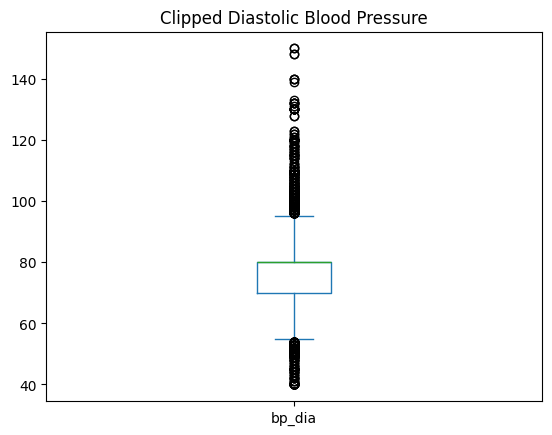

In [ ]:
df.bp_dia.plot(kind = "box", title = "Clipped Diastolic Blood Pressure")

## Convert categorical to numerical

In [ ]:
# Merge similar labels together
df.replace({"Current_TB_Status":{"Currently on INH prophylaxis":"On treatment for disease"}}, inplace = True)

In [ ]:
df.replace({"Ageatstartofart": {0: df.Ageatstartofart.mean()}}, inplace = True)

In [ ]:
# Convert categorical to numerical

df.replace({"Educationallevel": {
    "Other": 0,
    "Primary school education": 1,
    "Secondary school education": 2,
    "Tertiary education complete": 3
}}, inplace = True)

C:\Users\Eby\AppData\Local\Temp\ipykernel_1200\1811938195.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Educationallevel": {


In [ ]:
# Rename some labels
df.replace({"MaritalStatus":{
    "Lives alone":"Never married",
    "Living with partner":"Married",
    "Divorced": "Separated",
    "Widowed": "Separated"
}}, inplace = True)

# Convert categorical to numerical
df.replace({"MaritalStatus": {
    "Never married": 0,
    "Separated": 1,
    "Married": 2
}}, inplace = True)

C:\Users\Eby\AppData\Local\Temp\ipykernel_1200\1921095325.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"MaritalStatus": {


In [ ]:
df.head()

,Sex,Ageatstartofart,ARTStartDate,Duration on ART (Days),Pharmacy_LastPickupdate,DaysOfARVRefill,CurrentViralLoad,PATIENT HAS DIED,Current_Age,Educationallevel,MaritalStatus,Employment Status,LastWeight,Whostage,Days_To_Scheduled Appointment,Appointment_Status,Current_TB_Status,bp_sys,bp_dia,RegimenLineCombinationEncoded,RegimenARTCombinationEncoded
0,Female,36.0,2020-05-05,1426,2024-07-03,90.0,111.0,False,40,2.0,2.0,Employee,57.0,1,54.0,Active With Drugs,No signs or symptoms of disease,100,60,0,43
1,Male,68.0,2019-08-01,1909,2023-09-18,180.0,0.0,False,74,2.0,0.0,Unemployed,87.0,1,-27.0,Missed Appointment,No signs or symptoms of disease,132,74,0,68
2,Male,68.0,2019-03-01,1914,2024-01-23,180.0,73179.0,False,73,NaN,1.0,Employee,75.0,1,100.0,Active With Drugs,No signs or symptoms of disease,100,80,0,68
4,Female,57.0,2019-10-01,1907,2024-03-28,180.0,27300.0,False,62,2.0,1.0,Employee,39.0,1,165.0,Active With Drugs,No signs or symptoms of disease,145,77,0,80
6,Male,42.0,2019-03-01,1914,2024-03-14,180.0,0.0,False,47,2.0,NaN,Employee,65.0,1,151.0,Active With Drugs,No signs or symptoms of disease,100,60,0,68


# Variables

1. Whostage
2. Tuberculosis
3. Current Age
4. Education
5. Maritals
6. Sex
7. Duration on ART (Days)
8. bp_sys
9. bp_dia

In [ ]:
columns_use = [
    "Whostage",
    "Current_TB_Status",
    "Current_Age",
    "Educationallevel",
    "MaritalStatus",
    "Sex",
    "Duration on ART (Days)",
    "bp_sys",
    "bp_dia",
    "PATIENT HAS DIED",
    "RegimenLineCombinationEncoded",
    "RegimenARTCombinationEncoded"
]

In [ ]:
df_filtered = df[columns_use]

In [ ]:
df_filtered

,Whostage,Current_TB_Status,Current_Age,Educationallevel,MaritalStatus,Sex,Duration on ART (Days),bp_sys,bp_dia,PATIENT HAS DIED,RegimenLineCombinationEncoded,RegimenARTCombinationEncoded
0,1,No signs or symptoms of disease,40,2.0,2.0,Female,1426,100,60,False,0,43
1,1,No signs or symptoms of disease,74,2.0,0.0,Male,1909,132,74,False,0,68
2,1,No signs or symptoms of disease,73,NaN,1.0,Male,1914,100,80,False,0,68
4,1,No signs or symptoms of disease,62,2.0,1.0,Female,1907,145,77,False,0,80
6,1,No signs or symptoms of disease,47,2.0,NaN,Male,1914,100,60,False,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...
68041,1,No signs or symptoms of disease,21,2.0,0.0,Male,20,100,68,False,0,68
68042,1,No signs or symptoms of disease,30,2.0,1.0,Male,12,120,90,False,0,68
68043,2,No signs or symptoms of disease,20,2.0,0.0,Female,12,100,65,False,0,68
68044,1,No signs or symptoms of disease,20,1.0,0.0,Female,10,110,70,False,0,68


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51637 entries, 0 to 68045
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Whostage                       51637 non-null  int32  
 1   Current_TB_Status              51522 non-null  object 
 2   Current_Age                    51637 non-null  int64  
 3   Educationallevel               44242 non-null  float64
 4   MaritalStatus                  49504 non-null  float64
 5   Sex                            51637 non-null  object 
 6   Duration on ART (Days)         51637 non-null  int64  
 7   bp_sys                         51637 non-null  int32  
 8   bp_dia                         51637 non-null  int32  
 9   PATIENT HAS DIED               51637 non-null  bool   
 10  RegimenLineCombinationEncoded  51637 non-null  int32  
 11  RegimenARTCombinationEncoded   51637 non-null  int32  
dtypes: bool(1), float64(2), int32(5), int64(2), object(

In [ ]:
df_filtered = pd.get_dummies(df_filtered, columns=['Sex', "Current_TB_Status"])

In [ ]:
df_filtered.to_csv("filtered_data_na", index = False)

In [ ]:
df_filtered["MaritalStatus"].fillna(df_filtered["MaritalStatus"].mode()[0], inplace=True)

C:\Users\Eby\AppData\Local\Temp\ipykernel_14804\206959065.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered["MaritalStatus"].fillna(df_filtered["MaritalStatus"].mode()[0], inplace=True)
C:\Users\Eby\AppData\Local\Temp\ipykernel_14804\206959065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["MaritalStatus"].fillna

In [ ]:
df_filtered["Educationallevel"].fillna(df_filtered["Educationallevel"].mode()[0], inplace=True)

C:\Users\Eby\AppData\Local\Temp\ipykernel_14804\27200569.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered["Educationallevel"].fillna(df_filtered["Educationallevel"].mode()[0], inplace=True)
C:\Users\Eby\AppData\Local\Temp\ipykernel_14804\27200569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Educationallevel"]

In [ ]:
df_filtered.head()

,Whostage,Current_TB_Status,Current_Age,Educationallevel,MaritalStatus,Sex,Duration on ART (Days),bp_sys,bp_dia,PATIENT HAS DIED,RegimenLineCombinationEncoded,RegimenARTCombinationEncoded
0,1,No signs or symptoms of disease,40,2.0,2.0,Female,1426,100,60,False,0,43
1,1,No signs or symptoms of disease,74,2.0,0.0,Male,1909,132,74,False,0,68
2,1,No signs or symptoms of disease,73,2.0,1.0,Male,1914,100,80,False,0,68
4,1,No signs or symptoms of disease,62,2.0,1.0,Female,1907,145,77,False,0,80
6,1,No signs or symptoms of disease,47,2.0,0.0,Male,1914,100,60,False,0,68


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51637 entries, 0 to 68045
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Whostage                                           51637 non-null  int32  
 1   Current_Age                                        51637 non-null  int64  
 2   Educationallevel                                   51637 non-null  float64
 3   MaritalStatus                                      51637 non-null  float64
 4   Duration on ART (Days)                             51637 non-null  int64  
 5   bp_sys                                             51637 non-null  int32  
 6   bp_dia                                             51637 non-null  int32  
 7   PATIENT HAS DIED                                   51637 non-null  bool   
 8   RegimenLineCombinationEncoded                      51637 non-null  int32  
 9   RegimenARTC

In [ ]:
df_filtered.to_csv("filtered_data", index = False)

In [ ]:
from sklearn.model_selection import train_test_split
X = df_filtered.drop('PATIENT HAS DIED', axis=1)
y = df_filtered['PATIENT HAS DIED']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model 1

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [ ]:
# Define the preprocessing pipeline
preprocessor = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler())  # Optional: standardize features (if needed)
])

# Define the full pipeline
pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),  # Apply preprocessing steps
    ('classifier', LogisticRegression())  # Logistic Regression model
])

# Example usage
# X_train, y_train would be your training data and labels
# pipeline.fit(X_train, y_train)

pipeline.fit(X_train, y_train)

C:\Users\Eby\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('classifier', LogisticRegression())])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# auc_roc = roc_auc_score(y_test, y_prob)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
# print(f'AUC-ROC: {auc_roc}')

Accuracy: 0.9732765298218435
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


# Model 2

In [ ]:

# Define the preprocessing pipeline
preprocessor2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler())  # Optional: standardize features (if needed)
])

# Define the full pipeline
pipeline2 = Pipeline(steps=[
#     ('preprocessor', preprocessor),  # Apply preprocessing steps
    ('classifier', LogisticRegression(class_weight='balanced'))  # Logistic Regression model
])

pipeline2.fit(X_train, y_train)

C:\Users\Eby\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('classifier', LogisticRegression(class_weight='balanced'))])

In [ ]:
y_pred2 = pipeline2.predict(X_test)
# y_prob2 = pipeline2.predict_log_proba(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
# auc_roc = roc_auc_score(y_test, y_prob2)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
# print(f'AUC-ROC: {auc_roc}')


Accuracy: 0.744577846630519
Precision: 0.07194504699927694
Recall: 0.737037037037037
F1 Score: 0.1310935441370224


- Positive class: Died
- Negative class: Not dead

---

False negative = Model says the patient will not die but the patient dies.
- High recall = Decrease in false negatives. Therefore, we aim for a high recall.